In [7]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt


df=pd.read_csv('LoanApprovalPrediction.csv')

In [8]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [9]:
obj=(df.dtypes=='object')
print('objects variables: ',len(list(obj[obj].index)))

objects variables:  7


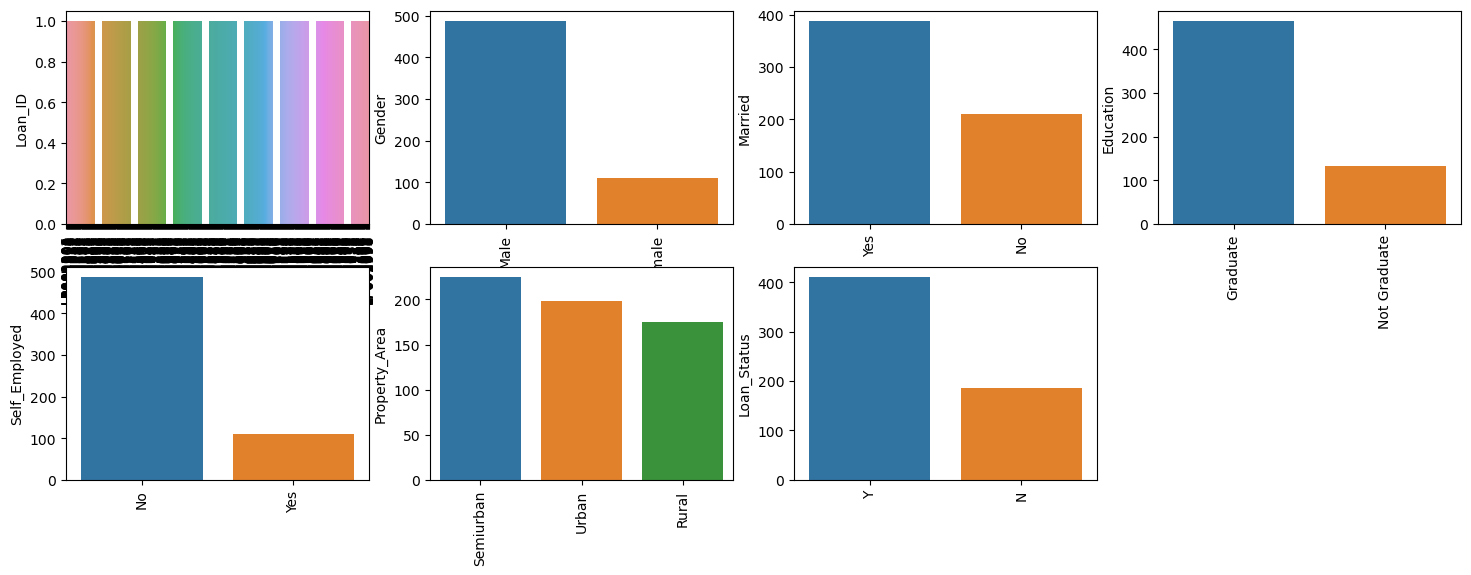

In [10]:
object_cols=list(obj[obj].index)
plt.figure(figsize=(18,36))
index=1

for col in object_cols:
    y=df[col].value_counts()
    plt.subplot(11,4,index)
    plt.xticks(rotation=90)
    sn.barplot(x=list(y.index), y=y)
    index+=1

In [11]:
df.drop(['Loan_ID'],axis=1, inplace=True)

In [12]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
obj=(df.dtypes=='object')
for col in list(obj[obj].index):
    df[col]=label_encoder.fit_transform(df[col])


In [13]:
# To find the number of columns with 
# datatype==object 
obj = (df.dtypes == 'object') 
print("Categorical variables:",len(list(obj[obj].index)))



Categorical variables: 0


<Axes: >

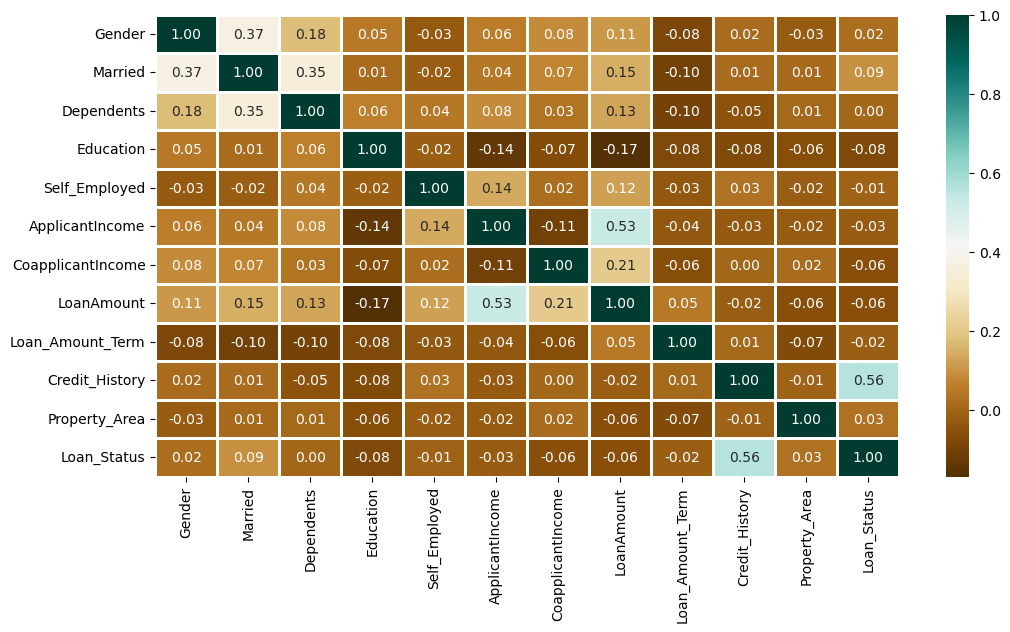

In [14]:
plt.figure(figsize=(12,6))
sn.heatmap(df.corr(),cmap='BrBG',fmt='.2f',
          linewidths=2,annot=True)

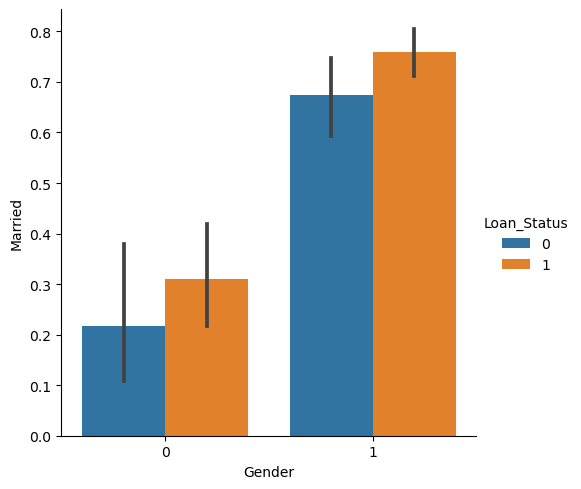

In [15]:
sn.catplot(x='Gender', y='Married',
           hue='Loan_Status',
           kind='bar',
           data=df)

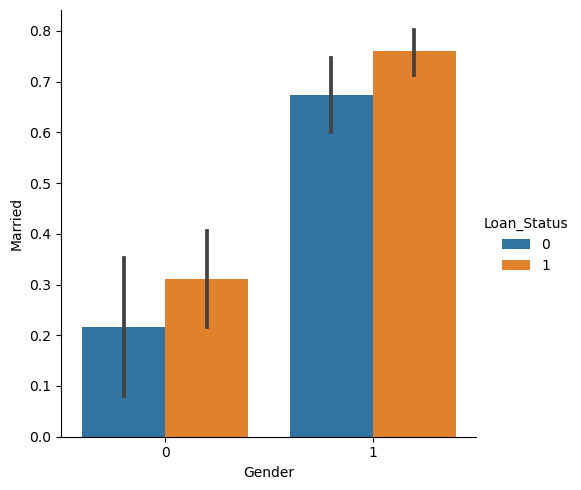

In [16]:
sn.catplot(x="Gender", y="Married", 
			hue="Loan_Status", 
			kind="bar", 
			data=df)


In [17]:
for col in df.columns:
    df[col]=df[col].fillna(df[col].mean())


    
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [18]:
from sklearn.model_selection import train_test_split
x=df.drop(['Loan_Status'],axis=1)
y=df['Loan_Status']

x.shape, y.shape


x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.4, random_state=42)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((358, 11), (240, 11), (358,), (240,))

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn import metrics


rfc=RandomForestClassifier(n_estimators=7, criterion='entropy', random_state=7)

knn=KNeighborsClassifier(n_neighbors=3)

svc=SVC()

lc=LogisticRegression()


for clf in (rfc,knn,svc,lc):
    clf.fit(x_train, y_train)
    y_pred=clf.predict(x_train)
    print("Accuracy score of ", 
          clf.__class__.__name__, 
          "=",100*metrics.accuracy_score(y_train,  
                                         y_pred))

Accuracy score of  RandomForestClassifier = 97.20670391061452
Accuracy score of  KNeighborsClassifier = 75.41899441340783
Accuracy score of  SVC = 68.43575418994413
Accuracy score of  LogisticRegression = 81.28491620111731


C:\Users\Welcome\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
for clf in(rfc,knn,svc,lc):
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    print("Accuracy score of ", 
         clf.__class__.__name__,'=',100*metrics.accuracy_score(y_test,y_pred))

Accuracy score of  RandomForestClassifier = 77.08333333333334
Accuracy score of  KNeighborsClassifier = 65.0
Accuracy score of  SVC = 69.58333333333333
Accuracy score of  LogisticRegression = 78.75


C:\Users\Welcome\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
